In [1]:
import pennylane as qml
import numpy as np

def U(wires):
    return qml.PhaseShift(2 * np.pi / 5, wires=wires)

In [2]:
dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit_qpe(estimation_wires):
    # initialize to state |1>
    qml.PauliX(wires=0)

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(U(wires=0), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)

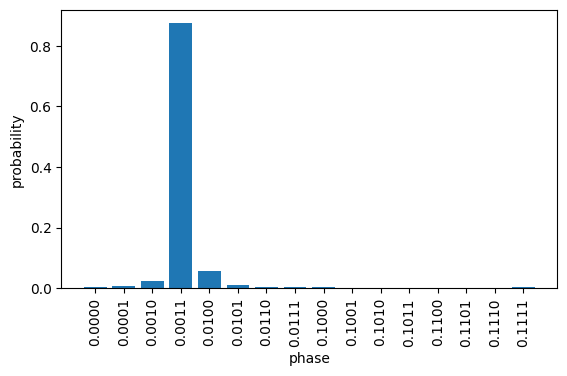

In [3]:
import matplotlib.pyplot as plt

estimation_wires = range(1, 5)

results = circuit_qpe(estimation_wires)

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()